(5000, 2)
(5000,)


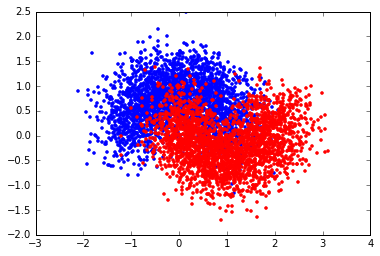

In [ ]:
from sklearn import datasets
from polyssifier import poly, plot
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt 

%matplotlib inline
data, label = make_moons(n_samples=5000, noise=0.4)
print(data.shape)
print(label.shape)

label0 = np.where(label==0)[0]
label1 = np.where(label==1)[0]

plt.plot(data[label0,0], data[label0,1],'.');
plt.plot(data[label1,0], data[label1,1],'r.');

In [ ]:
%rm -rf _models
scores, confusions, predictions = poly(data,label, n_folds=8, verbose=1, feature_selection=False, scoring='f1', concurrency=4)

INFO:polyssifier.polyssifier:Building classifiers ...
INFO:polyssifier.polyssifier:Initialization, done.


In [ ]:
plot(scores)

In [ ]:
for key, val in confusions.items():
    print(key)
    print(val)

In [ ]:
for key, pred in predictions.items():
    plt.figure()
    missclass = np.where(pred==0)[0]
    corrclass = np.where(pred==1)[0]
    plt.plot(data[corrclass,0], data[corrclass,1],'r.', alpha=0.8);
    plt.plot(data[missclass,0], data[missclass,1],'b.', alpha=0.8);
    plt.legend(['class 1', 'class2'])
    plt.title('{0} ({1:.2f}%)'.format(key, 100*np.mean(scores[key]['test']) ))